# Implement K-Nearest Neighbor (KNN) 

In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import math
import matplotlib.pyplot as plt

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
#data.columns=["sepal length","sepal width","petal length","petal width","class"]
data.head()

NameError: name 'pandas' is not defined

In [305]:
data_train = data.sample(frac=0.8, random_state=1)
data_test = data.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

In [307]:
#seprate trainset to X and Y
data_train_X = data_train.drop(["class"], axis=1) 
data_train_Y = data_train[["class"]]
data_train_X = data_train_X.as_matrix()
data_train_Y = data_train_Y.as_matrix()

# #seprate testset to X and Y
data_test_X = data_test.drop(["class"], axis=1)
data_test_Y =data_test[["class"]]
data_test_X = data_test_X.as_matrix()
data_test_Y = data_test_Y.as_matrix()

In [415]:
from operator import itemgetter

def KNN(data_train_X,data_train_Y, data_test_X, K):
    data_predicted_Y = []
    for i in range(len(data_test_X)):
        distance =[]
        knn = []
        for j in range(len(data_train_X)):
            virginica = 0 
            versicolor = 0
            setosa = 0
            eu_dist = np.sqrt(np.sum((data_test_X[i]-data_train_X[j])**2)) #ecliudean distance
            distance.append(( data_train_Y[j] , eu_dist)) 
            distance.sort(key = itemgetter(1)) #sort based on distance
            knn = distance[:K] # first k elements, K number of nearest neighbours    
        #vote to classes(which class this data belongs to?)
        for k in knn:
            if k[0] =='Iris-setosa':
                setosa += 1
            elif k[0] =='Iris-versicolor':
                versicolor +=1
            else:
                virginica += 1
        if versicolor == max( virginica, versicolor, setosa) :
            data_predicted_Y.append('Iris-versicolor')
        elif setosa == max( virginica, versicolor, setosa) :
            data_predicted_Y.append('Iris-setosa')
        else:
            data_predicted_Y.append('Iris-virginica')
    return data_predicted_Y

In [423]:
# my criterion for accuracy, accuracy= (number of correct predictions)/(number of all predictions)

In [424]:
def accuracy (data_test,data_predicted):
    correct = 0
    for i in range(len(data_test)):
        if(data_test[i] == data_predicted[i]): #comparing prediction with real data 
            correct +=1 #count number of correct predictions
    return correct/len(data_test) # number of correct predictions/ number of all predictions

Apply KNN function when K=3

In [425]:
data_predicted_Y = KNN(data_train_X,data_train_Y, data_test_X, K=3)

In [426]:
print("Classification Result by KNN: ")
print(data_predicted_Y)

Classification Result by KNN: 
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']


In [427]:
Accuracy = accuracy(data_test_Y,data_predicted_Y) 
print("Accuracy= %"+str(Accuracy*100.0))

Accuracy= %96.66666666666667


# Optimize and Compare KNN algorithm

Part a)

Lets run KNN for different values of K

In [430]:
K_value = [2,3,5,7,9]

Accuracy_K = []
for K in K_value:
    data_predicted_Y = KNN(data_train_X,data_train_Y, data_test_X, K)
    Accuracy = accuracy(data_test_Y,data_predicted_Y)
    Accuracy_K.append(Accuracy)
    print("K= "+str(K),"Accuracy= "+str(Accuracy*100.0))

K= 2 Accuracy= 90.0
K= 3 Accuracy= 96.66666666666667
K= 5 Accuracy= 96.66666666666667
K= 7 Accuracy= 96.66666666666667
K= 9 Accuracy= 100.0


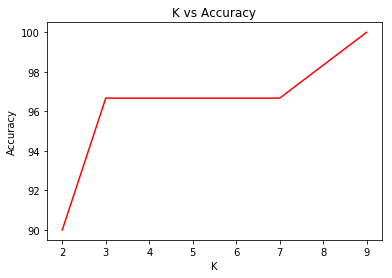

In [431]:
plt.plot(K_value, np.dot(Accuracy_K,100.0),'r')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

As we saw in graph (K vs Accuracy), when k=9, accuracy is %100 then it means k=9 is the best k for our model.

In [436]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': np.arange(1, 10)} #depth of decision tree is hyperparameter
DTC = GridSearchCV(DecisionTreeClassifier(), param_grid)
DTC.fit(data_train_X, data_train_Y)
data_predicted_Y = DTC.predict_proba(data_test_X)
DTC.best_params_

{'max_depth': 2}

In [368]:
#MAx_depth = 2
DTC =  DecisionTreeClassifier(max_depth=2)
DTC.fit(data_train_X, data_train_Y)
data_predicted_Y = DTC.predict(data_test_X)
print(data_predicted_Y)
Accuracy = accuracy(data_test_Y,data_predicted_Y)
Accuracy_K.append(Accuracy)
print("Accuracy= "+str(Accuracy))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica']
Accuracy= 0.9


In [372]:
#finding best K for K nearest neighbour

In [437]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'n_neighbors': np.arange(1, 10)}

KNN = GridSearchCV(KNeighborsClassifier(), param_grid)
KNN.fit(data_train_X, data_train_Y.ravel())
data_predicted_Y = KNN.predict_proba(data_test_X)
KNN.best_params_

{'n_neighbors': 9}

Also in my KNN implementation accuracy was %100 when k=9.

In [440]:
#K = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(data_train_X, data_train_Y.ravel())
data_predicted_Y = knn.predict(data_test_X)
print(data_predicted_Y)
Accuracy = accuracy(data_test_Y,data_predicted_Y)
Accuracy_K.append(Accuracy)
print("Accuracy= %"+str(Accuracy*100.0))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']
Accuracy= %100.0


Optimized Decision tree accuracy= %90

Optimized K nearest neighbours = %100